In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quality-of-life-for-each-country/Quality_of_Life.csv


___
### Importing Matplotlib and Seaborn for visualization

___

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

___
#### Loading in the dataset while assigning the country column as the index.
___

In [3]:
df = pd.read_csv('/kaggle/input/quality-of-life-for-each-country/Quality_of_Life.csv', index_col = ['country'])

___
#### Checking the basic overview of the data we have:
___

In [4]:
df.head()

,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
country,,,,,,,,,,,,,,,,,,
Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'


___
# Cleaning Data:
____
### Removing White Spaces from Column Name:
#### We first remove the spaces from the column names for better typeability.
___

In [5]:
df.columns = df.columns.str.replace(" ", "")
df

,PurchasingPowerValue,PurchasingPowerCategory,SafetyValue,SafetyCategory,HealthCareValue,HealthCareCategory,ClimateValue,ClimateCategory,CostofLivingValue,CostofLivingCategory,PropertyPricetoIncomeValue,PropertyPricetoIncomeCategory,TrafficCommuteTimeValue,TrafficCommuteTimeCategory,PollutionValue,PollutionCategory,QualityofLifeValue,QualityofLifeCategory
country,,,,,,,,,,,,,,,,,,
Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis And Futuna,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN
Western Sahara,0.00,NaN,62.87,'High',0.00,NaN,0.00,NaN,0.00,NaN,12.75,'High',0.00,NaN,0.00,NaN,0.0,NaN
Yemen,20.74,'Very Low',34.07,'Low',25.31,'Low',0.00,NaN,48.66,'Low',15.98,'High',15.00,'Very Low',83.17,'Very High',0.0,NaN


___
### Removing ' from Categorical Column
___

In [6]:
df['PurchasingPowerCategory'] = df['PurchasingPowerCategory'].str.strip("'")
df['SafetyCategory'] = df['SafetyCategory'].str.strip("'")
df['HealthCareCategory'] = df['HealthCareCategory'].str.strip("'")
df['ClimateCategory'] = df['ClimateCategory'].str.strip("'")
df['CostofLivingCategory'] = df['CostofLivingCategory'].str.strip("'")
df['PropertyPricetoIncomeCategory'] = df['PropertyPricetoIncomeCategory'].str.strip("'")
df['TrafficCommuteTimeCategory'] = df['TrafficCommuteTimeCategory'].str.strip("'")
df['PollutionCategory'] = df['PollutionCategory'].str.strip("'")
df['QualityofLifeCategory'] = df['QualityofLifeCategory'].str.strip("'")
df.head()

,PurchasingPowerValue,PurchasingPowerCategory,SafetyValue,SafetyCategory,HealthCareValue,HealthCareCategory,ClimateValue,ClimateCategory,CostofLivingValue,CostofLivingCategory,PropertyPricetoIncomeValue,PropertyPricetoIncomeCategory,TrafficCommuteTimeValue,TrafficCommuteTimeCategory,PollutionValue,PollutionCategory,QualityofLifeValue,QualityofLifeCategory
country,,,,,,,,,,,,,,,,,,
Afghanistan,32.15,Very Low,25.33,Low,24.24,Low,0.00,NaN,21.08,Very Low,7.8,Low,56.17,Very High,84.44,Very High,0.0,NaN
Aland Islands,125.01,Very High,71.81,High,79.72,High,0.00,NaN,53.44,Low,5.33,Low,19.05,Very Low,18.05,Very Low,0.0,NaN
Albania,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,77.25,High,': 104.16',Low
Alderney,0.00,NaN,83.79,Very High,100.00,Very High,0.00,NaN,0.00,NaN,0.0,NaN,5.00,Very Low,1.72,Very Low,0.0,NaN
Algeria,27.60,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.7,Very High,45.09,High,63.87,High,': 98.83',Very Low


___
### Fixing Column Data Type:
#### Here we see that some Numeric Columns have non numeric data so we will clean that.
___

In [7]:
numeric_cols = df.select_dtypes(include = 'number')
category_cols = df.select_dtypes(exclude = 'number' )

In [8]:
numeric_cols

,PurchasingPowerValue,SafetyValue,HealthCareValue,ClimateValue,CostofLivingValue,TrafficCommuteTimeValue,PollutionValue
country,,,,,,,
Afghanistan,32.15,25.33,24.24,0.00,21.08,56.17,84.44
Aland Islands,125.01,71.81,79.72,0.00,53.44,19.05,18.05
Albania,42.82,55.52,48.21,86.43,40.85,36.74,77.25
Alderney,0.00,83.79,100.00,0.00,0.00,5.00,1.72
Algeria,27.60,47.54,54.43,94.82,25.31,45.09,63.87
...,...,...,...,...,...,...,...
Wallis And Futuna,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Western Sahara,0.00,62.87,0.00,0.00,0.00,0.00,0.00
Yemen,20.74,34.07,25.31,0.00,48.66,15.00,83.17


In [9]:
category_cols

,PurchasingPowerCategory,SafetyCategory,HealthCareCategory,ClimateCategory,CostofLivingCategory,PropertyPricetoIncomeValue,PropertyPricetoIncomeCategory,TrafficCommuteTimeCategory,PollutionCategory,QualityofLifeValue,QualityofLifeCategory
country,,,,,,,,,,,
Afghanistan,Very Low,Low,Low,NaN,Very Low,7.8,Low,Very High,Very High,0.0,NaN
Aland Islands,Very High,High,High,NaN,Low,5.33,Low,Very Low,Very Low,0.0,NaN
Albania,Low,Moderate,Moderate,Very High,Low,14.88,High,Moderate,High,': 104.16',Low
Alderney,NaN,Very High,Very High,NaN,NaN,0.0,NaN,Very Low,Very Low,0.0,NaN
Algeria,Very Low,Moderate,Moderate,Very High,Very Low,21.7,Very High,High,High,': 98.83',Very Low
...,...,...,...,...,...,...,...,...,...,...,...
Wallis And Futuna,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
Western Sahara,NaN,High,NaN,NaN,NaN,12.75,High,NaN,NaN,0.0,NaN
Yemen,Very Low,Low,Low,NaN,Low,15.98,High,Very Low,Very High,0.0,NaN


___
#### Here we see that QualityofLifeValue and PropertyPricetoIncomeValue are still objects as they seem to have non numeric data in them. So we will clean it.
___

In [10]:
category_cols['PropertyPricetoIncomeValue'].unique()

array(['7.8', '5.33', '14.88', '0.0', '21.7', '9.03', '8.01',
       '1.8399999999999999', '20.05', '20.95', '5.32', '8.25', '11.76',
       '15.24', '4.9', '12.26', '14.67', '12.79', '6.82', '6.06', '6.85',
       '14.07', '12.54', '13.12', '118.01', '15.4', '6.97', '9.22',
       '1.25', '20.67', '26.77', '46.06', '10.47', '17.12', '8.64', '8.5',
       '2.69', '16.03', '28.6', '17.98', '11.15', '9.63', '12.45', '48.0',
       '8.06', '13.17', '37.22', '6.36', '12.41', '0.64', '16.89', '12.0',
       '17.85', '16.0', '7.15', '4.41', '11.27', '2.8200000000000003',
       '49.87', '8.75', '6.51', '8.16', '10.55', '8.04', '29.58', '69.71',
       '103.29', '12.21', '9.12', '81.28', '12.72', '4.75', '175.23',
       '9.65', '11.44', '9.66', '0.68', '7.13', '19.72', '5.5', '29.83',
       '13.22', '6.39', '11.26', '16.65', '8.17', '6.58', '3.63', '13.98',
       '9.47', '41.78', '20.19', '12.29', '13.33', '6.77', '10.27',
       '18.77', '13.85', '6.69', '12.89', '12.67', '8.38', '16.26',

In [11]:
category_cols['PropertyPricetoIncomeValue'] = category_cols['PropertyPricetoIncomeValue'].str.strip("''")
category_cols['PropertyPricetoIncomeValue'] = category_cols['PropertyPricetoIncomeValue'].str.replace(",","")
category_cols['PropertyPricetoIncomeValue'] = category_cols['PropertyPricetoIncomeValue'].astype(float)

In [12]:
category_cols['QualityofLifeValue'].unique()

array(['0.0', "': 104.16'", "': 98.83'", "': 115.06'", "': 116.56'",
       "': 190.69'", "': 192.07'", "': 113.51'", "': 158.68'",
       "': 74.51'", "': 127.48'", "': 168.52'", "': 134.51'", "': 36.55'",
       "': 115.99'", "': 144.49'", "': 78.92'", "': 164.54'",
       "': 106.49'", "': 120.52'", "': 107.90'", "': 129.35'",
       "': 176.02'", "': 158.84'", "': 174.21'", "': 208.65'",
       "': 89.09'", "': 125.58'", "': 85.41'", "': 93.05'", "': 185.10'",
       "': 48.88'", "': 122.12'", "': 203.06'", "': 165.08'",
       "': 125.48'", "': 189.75'", "': 17.47'", "': 136.83'",
       "': 107.92'", "': 134.04'", "': 143.26'", "': 202.04'",
       "': 124.70'", "': 99.98'", "': 85.42'", "': 107.76'", "': 166.37'",
       "': 161.76'", "': 151.06'", "': 83.92'", "': 184.32'",
       "': 125.01'", "': 105.92'", "': 101.33'", "': 130.09'",
       "': 159.55'", "': 98.32'", "': 164.22'", "': 98.43'", "': 134.14'",
       "': 172.77'", "': 224.31'", "': 149.76'", "': 136.22'",
      

In [13]:
category_cols['QualityofLifeValue'] = category_cols['QualityofLifeValue'].str.strip("':'")
category_cols['QualityofLifeValue'] = category_cols['QualityofLifeValue'].str.replace(" ", "")
category_cols['QualityofLifeValue'] = category_cols['QualityofLifeValue'].astype(float)

____
#### Now that we have turned the Numeric columns into float64 type, we will assign them into the original dataframe.
____

In [14]:
df['PropertyPricetoIncomeValue'] = category_cols['PropertyPricetoIncomeValue']
df['QualityofLifeValue'] = category_cols['QualityofLifeValue']
df.head()

,PurchasingPowerValue,PurchasingPowerCategory,SafetyValue,SafetyCategory,HealthCareValue,HealthCareCategory,ClimateValue,ClimateCategory,CostofLivingValue,CostofLivingCategory,PropertyPricetoIncomeValue,PropertyPricetoIncomeCategory,TrafficCommuteTimeValue,TrafficCommuteTimeCategory,PollutionValue,PollutionCategory,QualityofLifeValue,QualityofLifeCategory
country,,,,,,,,,,,,,,,,,,
Afghanistan,32.15,Very Low,25.33,Low,24.24,Low,0.00,NaN,21.08,Very Low,7.80,Low,56.17,Very High,84.44,Very High,0.00,NaN
Aland Islands,125.01,Very High,71.81,High,79.72,High,0.00,NaN,53.44,Low,5.33,Low,19.05,Very Low,18.05,Very Low,0.00,NaN
Albania,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,77.25,High,104.16,Low
Alderney,0.00,NaN,83.79,Very High,100.00,Very High,0.00,NaN,0.00,NaN,0.00,NaN,5.00,Very Low,1.72,Very Low,0.00,NaN
Algeria,27.60,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.70,Very High,45.09,High,63.87,High,98.83,Very Low


----
### Checking for Null Values:
----

In [15]:
df.isna().sum()

PurchasingPowerValue               0
PurchasingPowerCategory           46
SafetyValue                        0
SafetyCategory                     2
HealthCareValue                    0
HealthCareCategory                15
ClimateValue                       0
ClimateCategory                  122
CostofLivingValue                  0
CostofLivingCategory              45
PropertyPricetoIncomeValue         0
PropertyPricetoIncomeCategory     21
TrafficCommuteTimeValue            0
TrafficCommuteTimeCategory        29
PollutionValue                     0
PollutionCategory                 10
QualityofLifeValue                 0
QualityofLifeCategory            122
dtype: int64

----
#### We see that we have quite a lot of null values, so we will clean that up as well. ( Now using the correct separation of Numeric and Categorical Columns )
----

In [16]:
numeric_cols = df.select_dtypes(include = 'number')
category_cols = df.select_dtypes(exclude = 'number' )

In [17]:
numeric_cols

,PurchasingPowerValue,SafetyValue,HealthCareValue,ClimateValue,CostofLivingValue,PropertyPricetoIncomeValue,TrafficCommuteTimeValue,PollutionValue,QualityofLifeValue
country,,,,,,,,,
Afghanistan,32.15,25.33,24.24,0.00,21.08,7.80,56.17,84.44,0.00
Aland Islands,125.01,71.81,79.72,0.00,53.44,5.33,19.05,18.05,0.00
Albania,42.82,55.52,48.21,86.43,40.85,14.88,36.74,77.25,104.16
Alderney,0.00,83.79,100.00,0.00,0.00,0.00,5.00,1.72,0.00
Algeria,27.60,47.54,54.43,94.82,25.31,21.70,45.09,63.87,98.83
...,...,...,...,...,...,...,...,...,...
Wallis And Futuna,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Western Sahara,0.00,62.87,0.00,0.00,0.00,12.75,0.00,0.00,0.00
Yemen,20.74,34.07,25.31,0.00,48.66,15.98,15.00,83.17,0.00


----
#### We replace the value of 0 in the Numerical Column with the Mean value of that column
-----

In [18]:
def replace_0_with_mean(df):
    for col in df.columns:
        mean_value = df[col].mean()
        df[col] = df[col].replace(0, round(mean_value, 2))
    return df
    

In [19]:
numeric_cols = replace_0_with_mean(numeric_cols)

In [20]:
numeric_cols

,PurchasingPowerValue,SafetyValue,HealthCareValue,ClimateValue,CostofLivingValue,PropertyPricetoIncomeValue,TrafficCommuteTimeValue,PollutionValue,QualityofLifeValue
country,,,,,,,,,
Afghanistan,32.15,25.33,24.24,37.60,21.08,7.80,56.17,84.44,63.47
Aland Islands,125.01,71.81,79.72,37.60,53.44,5.33,19.05,18.05,63.47
Albania,42.82,55.52,48.21,86.43,40.85,14.88,36.74,77.25,104.16
Alderney,55.57,83.79,100.00,37.60,37.53,42.46,5.00,1.72,63.47
Algeria,27.60,47.54,54.43,94.82,25.31,21.70,45.09,63.87,98.83
...,...,...,...,...,...,...,...,...,...
Wallis And Futuna,55.57,55.27,54.73,37.60,37.53,42.46,28.49,54.27,63.47
Western Sahara,55.57,62.87,54.73,37.60,37.53,12.75,28.49,54.27,63.47
Yemen,20.74,34.07,25.31,37.60,48.66,15.98,15.00,83.17,63.47


----
####  Now we fill the NaN value of category columns with the mode value for those columns.
-----

In [21]:
category_cols = category_cols.apply(lambda x: x.fillna(x.mode()[0]))

In [22]:
category_cols

,PurchasingPowerCategory,SafetyCategory,HealthCareCategory,ClimateCategory,CostofLivingCategory,PropertyPricetoIncomeCategory,TrafficCommuteTimeCategory,PollutionCategory,QualityofLifeCategory
country,,,,,,,,,
Afghanistan,Very Low,Low,Low,Very High,Very Low,Low,Very High,Very High,Very High
Aland Islands,Very High,High,High,Very High,Low,Low,Very Low,Very Low,Very High
Albania,Low,Moderate,Moderate,Very High,Low,High,Moderate,High,Low
Alderney,Very Low,Very High,Very High,Very High,Very Low,Very High,Very Low,Very Low,Very High
Algeria,Very Low,Moderate,Moderate,Very High,Very Low,Very High,High,High,Very Low
...,...,...,...,...,...,...,...,...,...
Wallis And Futuna,Very Low,Moderate,High,Very High,Very Low,Very High,Very Low,High,Very High
Western Sahara,Very Low,High,High,Very High,Very Low,High,Very Low,High,Very High
Yemen,Very Low,Low,Low,Very High,Low,High,Very Low,Very High,Very High


----
# Exploratory Data Analysis ( EDA ):
##### Now that we have cleand out data we will carry out Exploratory Data Analysis
----

----
### Heatmap:
#### First, We make a Correlation matrix and Mask for creating a heatmap
----

In [23]:
corr = numeric_cols.corr()
mask = np.triu(corr)

----
#### Now wwe actually plot the heatmap.
----

<Axes: >

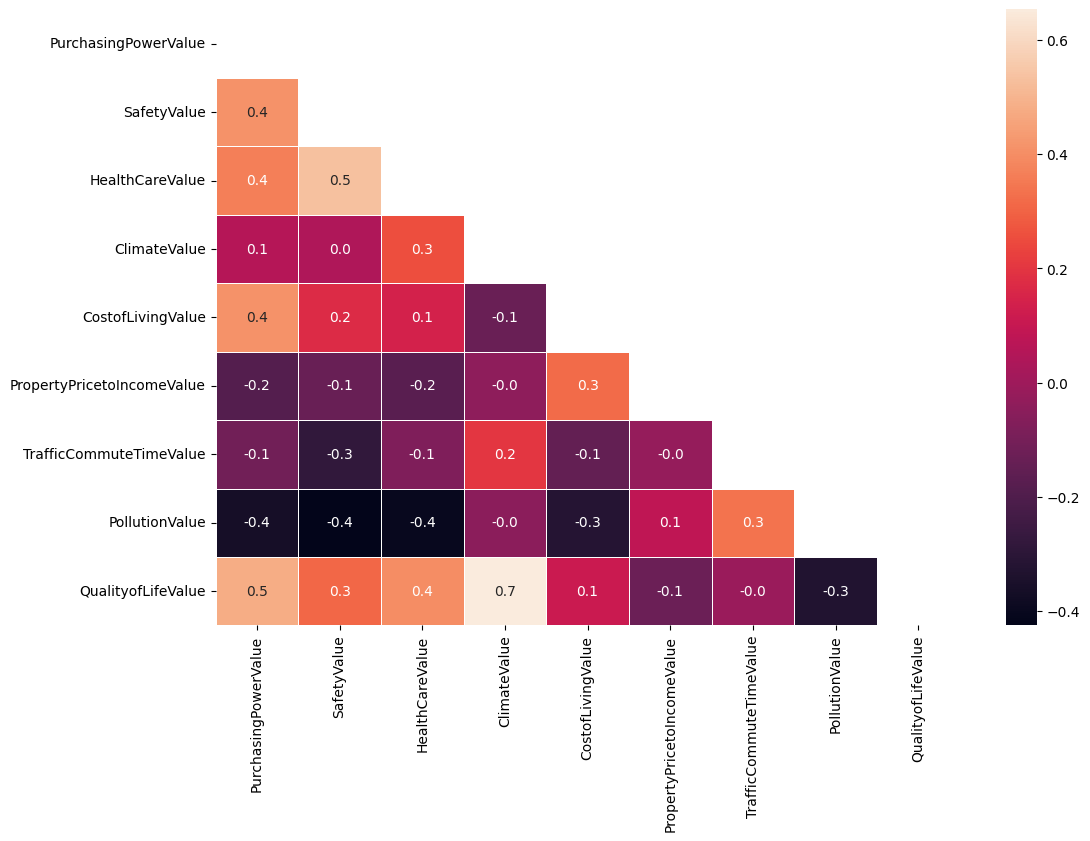

In [24]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(corr, mask = mask, annot = True, fmt=".1f", linewidth = 0.5)

----
## Insights:
----
##### Positive correlation:
1. QualityofLife and ClimateValue have a high positive correlation suggesting that better climate quality leads to a better quality of life.
2. Purchasing Power Value also seems to be a supporting factor for improved quality of life.
3. Quality of life also shows moderate positive corelation between safety value and health care value.
4. It also seems that with Increased Purchasing Power of the country, the cost of living also increases.
5. Pollution also seems to cause an increase in traffic commute time.

----

##### Negative correlation:
1. Pollution and Quality of Life seem to have a moderate negative correlation,suggesting that in order to achieve higher quality of life, a lower pollution value is required.
2. Better Climate quality seems to slightly help in lowering the cost of living.
3. Countries with higher purchasing power seem to have lower pollution value, primarily because of their ability to afford contemporary technology to control pollution.
4. It also seems that the in the countries where it is harder to afford properties, the health value is also relatively less.
5. Higher traffic commute times seem to promote less safety among citizens.
6. Higher traffic commute times also seem to be a minor indicators of countries with lower cost of living.
----

----
### Barplot:

#### first we make two separate dataframes with countries that have highest and lowest quality of life values respectively 

----

In [25]:
top_10_QOL = numeric_cols['QualityofLifeValue'].nlargest(10)
low_10_QOL = numeric_cols['QualityofLifeValue'].nsmallest(10)

In [26]:
top_10_QOL

country
Luxembourg     224.31
Oman           213.42
Netherlands    211.85
Denmark        208.65
Switzerland    204.91
Finland        203.06
Iceland        202.04
Norway         194.48
Sweden         193.48
Qatar          192.73
Name: QualityofLifeValue, dtype: float64

----
#### Since selecting and assigning the top 10 and bottom 10 values got us a series, we convert them to dataframe for plotting purpose.
----

In [27]:
top_10_QOL = pd.DataFrame(top_10_QOL)
low_10_QOL = pd.DataFrame(low_10_QOL)
top_10_QOL.reset_index( inplace = True)
low_10_QOL.reset_index( inplace = True)

In [28]:
top_10_QOL['Category'] = 'High'
low_10_QOL['Category'] = 'Low'

In [29]:
top_10_QOL

,country,QualityofLifeValue,Category
0,Luxembourg,224.31,High
1,Oman,213.42,High
2,Netherlands,211.85,High
3,Denmark,208.65,High
4,Switzerland,204.91,High
5,Finland,203.06,High
6,Iceland,202.04,High
7,Norway,194.48,High
8,Sweden,193.48,High
9,Qatar,192.73,High


In [30]:
low_10_QOL

,country,QualityofLifeValue,Category
0,Ghana,17.47,Low
1,Botswana,36.55,Low
2,Nigeria,41.24,Low
3,Ethiopia,48.88,Low
4,Mongolia,62.52,Low
5,Afghanistan,63.47,Low
6,Aland Islands,63.47,Low
7,Alderney,63.47,Low
8,American Samoa,63.47,Low
9,Andorra,63.47,Low


<Axes: xlabel='country', ylabel='QualityofLifeValue'>

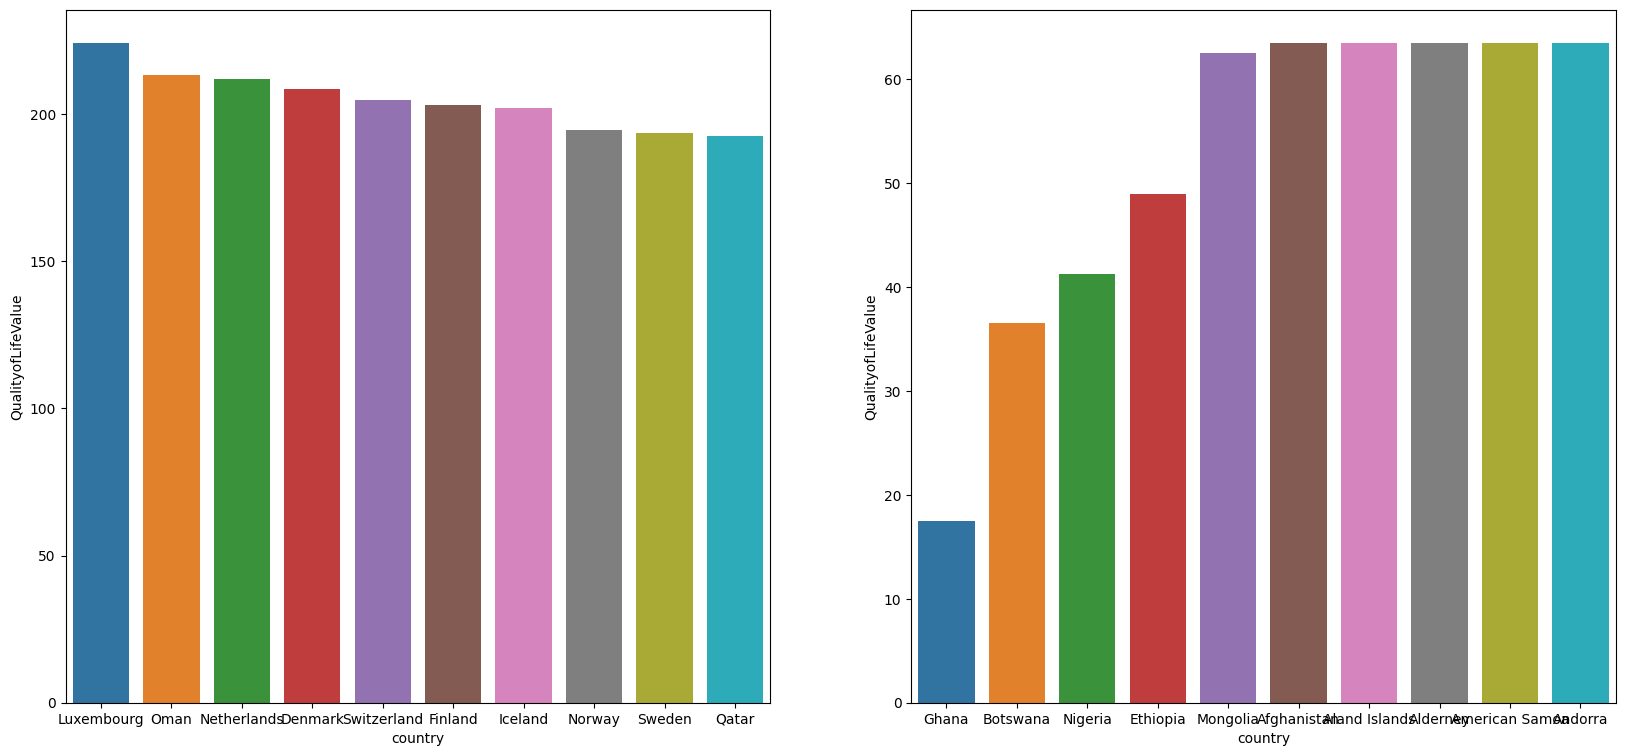

In [31]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 9))
sns.barplot(data = top_10_QOL, x = 'country', y = 'QualityofLifeValue', ax=ax[0] )
sns.barplot(data = low_10_QOL, x = 'country', y = 'QualityofLifeValue', ax=ax[1] )